In [257]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [258]:
df = pd.read_csv('Sleep_health_and_lifestyle_dataset.csv')
df.head()

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,NaN
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea


In [259]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374 entries, 0 to 373
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Person ID                374 non-null    int64  
 1   Gender                   374 non-null    object 
 2   Age                      374 non-null    int64  
 3   Occupation               374 non-null    object 
 4   Sleep Duration           374 non-null    float64
 5   Quality of Sleep         374 non-null    int64  
 6   Physical Activity Level  374 non-null    int64  
 7   Stress Level             374 non-null    int64  
 8   BMI Category             374 non-null    object 
 9   Blood Pressure           374 non-null    object 
 10  Heart Rate               374 non-null    int64  
 11  Daily Steps              374 non-null    int64  
 12  Sleep Disorder           155 non-null    object 
dtypes: float64(1), int64(7), object(5)
memory usage: 38.1+ KB


1. Данные о качестве сна содержат информацию по 13 характеристикам сна, всего 374 записей. 
2. В 11 признаках пропусков в данных нет, но в одном признаке Sleep Disorder всего 155 заполненных значений.
3. Характеристика Sleep Duration имеет числовое значение (непрерывное числовое значение), тип float64.
4. Характеристики Age, Quality of Sleep, Phusical Activity Level, Stress Level, Heart Rate, Daily Steps имеют целочисленное числовое значение тип int64.
5. Характеристики Gender, Occupation, BMI category, Blood Pressure, Sleep Disorder фвлфютсф категориальными признаками, тип object.

In [260]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Person ID,374.0,187.500000,108.108742,1.0,94.25,187.5,280.75,374.0
Age,374.0,42.184492,8.673133,27.0,35.25,43.0,50.00,59.0
Sleep Duration,374.0,7.132086,0.795657,5.8,6.40,7.2,7.80,8.5
Quality of Sleep,374.0,7.312834,1.196956,4.0,6.00,7.0,8.00,9.0
Physical Activity Level,374.0,59.171123,20.830804,30.0,45.00,60.0,75.00,90.0
Stress Level,374.0,5.385027,1.774526,3.0,4.00,5.0,7.00,8.0
Heart Rate,374.0,70.165775,4.135676,65.0,68.00,70.0,72.00,86.0
Daily Steps,374.0,6816.844920,1617.915679,3000.0,5600.00,7000.0,8000.00,10000.0


In [261]:
df.describe(include='object')

,Gender,Occupation,BMI Category,Blood Pressure,Sleep Disorder
count,374,374,374,374,155
unique,2,11,4,25,2
top,Male,Nurse,Normal,130/85,Sleep Apnea
freq,189,73,195,99,78


## Предобработка данных:

- Очистите данные от пропусков и аномалий.
- Преобразуйте категориальные переменные с помощью One-Hot Encoding или Label Encoding

In [262]:
# изучим признак Sleep Disorder, имеющий припущенные значения
df["Sleep Disorder"].isna().sum()

np.int64(219)

In [263]:
df["Sleep Disorder"].value_counts()

Sleep Disorder
Sleep Apnea    78
Insomnia       77
Name: count, dtype: int64

Данные содержат информацию по двум видам расстройства сна.

In [264]:
df["Sleep Disorder"].fillna("No disorder", inplace=True)
df["Sleep Disorder"].value_counts()

C:\Users\Dell 5531\AppData\Local\Temp\ipykernel_22200\2762153866.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Sleep Disorder"].fillna("No disorder", inplace=True)


Sleep Disorder
No disorder    219
Sleep Apnea     78
Insomnia        77
Name: count, dtype: int64

In [265]:
duration_mean = df["Sleep Duration"].groupby(df["Sleep Disorder"]).mean()
duration_mean

Sleep Disorder
Insomnia       6.589610
No disorder    7.358447
Sleep Apnea    7.032051
Name: Sleep Duration, dtype: float64

Предположим, что пропущенные значения  в признаке Sleep Disorder означают, что нарушения сна нет.
Среднее значения продолжительности сна в данных, где данных о нарушении сна нет - 7,358 ч, в то время как средняя продолжительность сна при Апнеа - 7,03, а при бессонице 6, 59.

In [308]:
numeric_columns = ["Age", "Physical Activity Level", "Stress Level", "Heart Rate", "Daily Steps"]

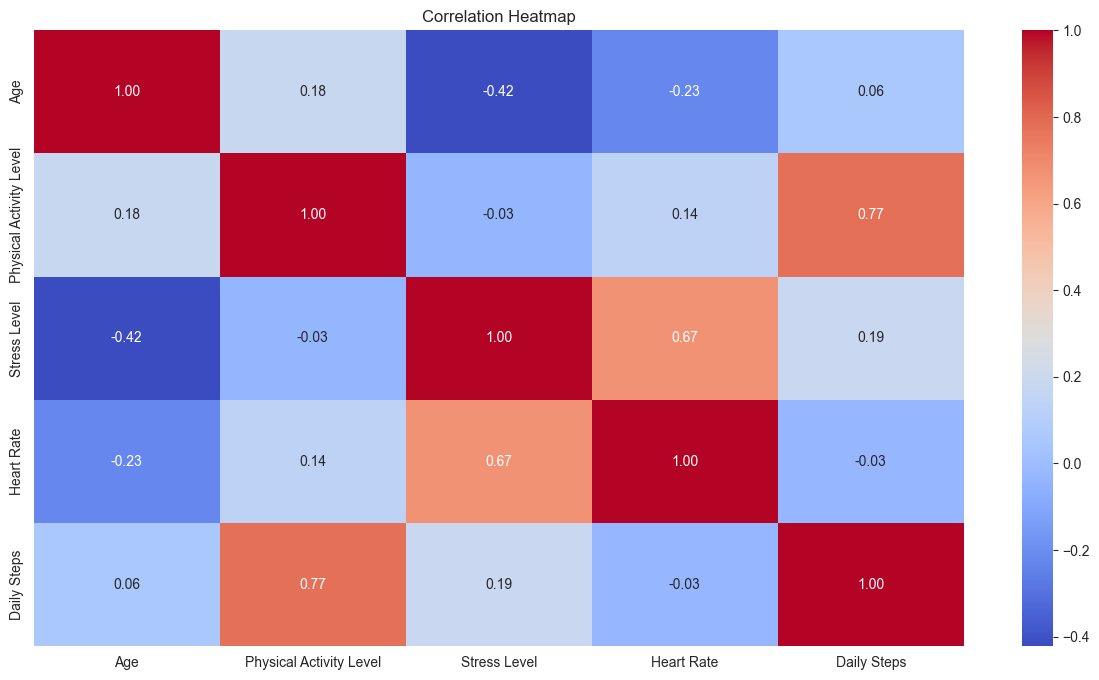

In [309]:
#Посчитаем матрицк корреляций между количественными признаками
correlation_matrix = df[numeric_columns].corr()  
# Heatmap
plt.figure(figsize=(15, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

In [268]:
df['BMI Category'].value_counts()

BMI Category
Normal           195
Overweight       148
Normal Weight     21
Obese             10
Name: count, dtype: int64

In [269]:
df['BMI Category'] = df['BMI Category'].apply(lambda x: 'Normal' if x == 'Normal Weight' else x)
df['BMI Category'].value_counts()

BMI Category
Normal        216
Overweight    148
Obese          10
Name: count, dtype: int64

In [270]:
from sklearn.preprocessing import LabelEncoder
selected_columns = df.loc[:, ['BMI Category', 'Sleep Disorder']]
# Создание LabelEncoder объекта
label_encoder = LabelEncoder()

# Кодирование столбцов
encoded_columns = {}
for column in selected_columns:
    df[column + '_encoded'] = label_encoder.fit_transform(df[column])
    # Сохраняем маппинг
    encoded_columns[column] = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))

# Вывод DataFrame
display(df)

# Вывод легенды кодировки для каждого столбца
for column, mapping in encoded_columns.items():
    print(f"Кодировка для {column}:", mapping)

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder,BMI Category_encoded,Sleep Disorder_encoded
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,No disorder,2,1
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,No disorder,0,1
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,No disorder,0,1
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea,1,2
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
369,370,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea,2,2
370,371,Female,59,Nurse,8.0,9,75,3,Overweight,140/95,68,7000,Sleep Apnea,2,2
371,372,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea,2,2
372,373,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea,2,2


Кодировка для BMI Category: {'Normal': np.int64(0), 'Obese': np.int64(1), 'Overweight': np.int64(2)}
Кодировка для Sleep Disorder: {'Insomnia': np.int64(0), 'No disorder': np.int64(1), 'Sleep Apnea': np.int64(2)}


При применении label-encoder видим, что BMI категория привоена 0 - для нормального веса, 1 - для ожирения, 2 - излишний вес.
Более логичным выглядит поменять местами 1 и 2, то есть 1 - для избыточного веса, 2 - ожирение.

В случае заболеваний сна, label encoder показал следующее разюиение: 0 - бессоница, 1 - нет заболеваний сна, 2 - апнеа.
Однако более логичным выглядит следующее разбиение: 0 - нет нарушений сна, 1 - апнеа, 2 - бессоница.

In [271]:
def bmi_category_encoder(data):
    if data == 'Normal':
        return 0
    elif data == 'Overweight':
        return 1
    elif data == 'Obese':
        return 2
    
    
df['BMI Category_encoded'] = df['BMI Category'].apply(bmi_category_encoder)

In [272]:
def sleep_category_encoder(data):
    if data == 'No disorder':
        return 0
    elif data == 'Sleep Apnea':
        return 1
    elif data == 'Insomnia':
        return 2  
    
df['Sleep Disorder_encoded'] = df['Sleep Disorder'].apply(sleep_category_encoder)

In [273]:
df.drop(['BMI Category', 'Sleep Disorder'], axis=1, inplace=True)

In [274]:
#Преобразуем колонку профессии через One-hot encoding
one_hot = pd.get_dummies(df[["Gender","Occupation"]], drop_first=True)
df = pd.concat((df.drop(["Gender","Occupation"], axis=1), one_hot), axis=1)
df.head()

,Person ID,Age,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,Blood Pressure,Heart Rate,Daily Steps,BMI Category_encoded,...,Occupation_Doctor,Occupation_Engineer,Occupation_Lawyer,Occupation_Manager,Occupation_Nurse,Occupation_Sales Representative,Occupation_Salesperson,Occupation_Scientist,Occupation_Software Engineer,Occupation_Teacher
0,1,27,6.1,6,42,6,126/83,77,4200,1,...,False,False,False,False,False,False,False,False,True,False
1,2,28,6.2,6,60,8,125/80,75,10000,0,...,True,False,False,False,False,False,False,False,False,False
2,3,28,6.2,6,60,8,125/80,75,10000,0,...,True,False,False,False,False,False,False,False,False,False
3,4,28,5.9,4,30,8,140/90,85,3000,2,...,False,False,False,False,False,True,False,False,False,False
4,5,28,5.9,4,30,8,140/90,85,3000,2,...,False,False,False,False,False,True,False,False,False,False


## Генерация новых признаков:

- cоздайте комбинированные признаки, которые могут помочь улучшить модель.
- используйте полиномиальные признаки для числовых переменных.

In [275]:
#Категорезируем кровяное давление, используем, как систолическое , так и диастолическое давление, при этом преобразуем категории сразу в числовое значение.

def blood_pressure_category(data):
    systolic, diastolic = tuple(int(x) for x in data.split('/'))
    if systolic < 130 or diastolic < 85:
        return 0
    elif systolic < 140 or diastolic < 90:
        return 1
    elif systolic < 160 or diastolic < 100:
        return 2
    else:
        return 3
    
    
df["Blood Pressure"] = df["Blood Pressure"].apply(blood_pressure_category)

In [276]:
df.head()

,Person ID,Age,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,Blood Pressure,Heart Rate,Daily Steps,BMI Category_encoded,...,Occupation_Doctor,Occupation_Engineer,Occupation_Lawyer,Occupation_Manager,Occupation_Nurse,Occupation_Sales Representative,Occupation_Salesperson,Occupation_Scientist,Occupation_Software Engineer,Occupation_Teacher
0,1,27,6.1,6,42,6,0,77,4200,1,...,False,False,False,False,False,False,False,False,True,False
1,2,28,6.2,6,60,8,0,75,10000,0,...,True,False,False,False,False,False,False,False,False,False
2,3,28,6.2,6,60,8,0,75,10000,0,...,True,False,False,False,False,False,False,False,False,False
3,4,28,5.9,4,30,8,2,85,3000,2,...,False,False,False,False,False,True,False,False,False,False
4,5,28,5.9,4,30,8,2,85,3000,2,...,False,False,False,False,False,True,False,False,False,False


In [277]:
from sklearn.model_selection import train_test_split
y = df['Sleep Duration']
X = df.drop(['Sleep Duration','Person ID', 'Quality of Sleep'], axis=1)

X_train, X_test, y_train, y_test = train_test_split(df, y, test_size=0.2, random_state=42)

In [278]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

lr = LinearRegression()
lr.fit(X_train, y_train)
y_train_pred = lr.predict(X_train)
y_test_pred = lr.predict(X_test)

print(f'MSE train: {mean_squared_error(y_train, y_train_pred)},\
\n R2 train : {r2_score(y_train, y_train_pred)}')
print(f'MSE test: {mean_squared_error( y_test, y_test_pred)},\
\n R2 test: {r2_score(y_test, y_test_pred)}')

MSE train: 1.8121665224782922e-26,
 R2 train : 1.0
MSE test: 2.0332016826003135e-26,
 R2 test: 1.0


In [282]:
from sklearn.preprocessing import PolynomialFeatures

poly_transformer = PolynomialFeatures(degree = 2)

poly_transformer.fit(X_train)
X_pol = poly_transformer.transform(X_train)
X_pol_test = poly_transformer.transform(X_test)
print('Polynomial Features shape: ', X_pol.shape)

### Замерим качество линейной простой модели на трейн и тест сплитах

linear_train_loss = np.mean((lr.predict(X_train)-y_train)**2)
linear_test_loss = np.mean((lr.predict(X_test)-y_test)**2)

### Теперь построим полиномиальную модель
model_pol = LinearRegression()
model_pol.fit(X_pol, y_train)

### Замерим качество полиномиальной простой модели на трейн и тест сплитах  

print(f'MSE train: {mean_squared_error(model_pol.predict(X_pol), y_train)},\
\n R2 train : {r2_score(y_train, y_train_pred)}')
print(f'MSE test: {mean_squared_error(model_pol.predict(X_pol_test), y_test)},\
\n R2 test: {r2_score(y_test, y_test_pred)}')


Polynomial Features shape:  (299, 276)
MSE train: 1.0846633911017756e-19,
 R2 train : 1.0
MSE test: 2.2028217706009763e-12,
 R2 test: 1.0


## Отбор признаков:

- Примените несколько методов отбора признаков (например, RFE, SelectKBest).
- Сравните качество модели до и после отбора признаков.

In [287]:
from sklearn.feature_selection import RFE
# Создаем RFE модель и выбираем 10 признаков
rfe = RFE(estimator=lr, n_features_to_select=10)
rfe = rfe.fit(X, y)

# Показываем какие признаки выбраны
selected_features = pd.DataFrame({
    'Feature': X.columns, 
    'Ranking': rfe.ranking_
})
print(selected_features.sort_values(by='Ranking', ascending=False))

                            Feature  Ranking
5                       Daily Steps       10
1           Physical Activity Level        9
3                    Blood Pressure        8
7            Sleep Disorder_encoded        7
0                               Age        6
8                       Gender_Male        5
4                        Heart Rate        4
12               Occupation_Manager        3
6              BMI Category_encoded        2
2                      Stress Level        1
9                 Occupation_Doctor        1
10              Occupation_Engineer        1
11                Occupation_Lawyer        1
13                 Occupation_Nurse        1
14  Occupation_Sales Representative        1
15           Occupation_Salesperson        1
16             Occupation_Scientist        1
17     Occupation_Software Engineer        1
18               Occupation_Teacher        1


In [288]:
top_features = selected_features.sort_values(by='Ranking', ascending=False)[:10]
X_train_selected = X_train[top_features.Feature]
X_test_selected = X_test[top_features.Feature]

# Обучение дерева решений на отобранных признаках
dt = LinearRegression()
dt.fit(X_train_selected, y_train)
print(f'R^2 на тренировочных данных {r2_score(y_train, dt.predict(X_train_selected))}')
print(f'R^2 на тестовых данных {r2_score(y_test, dt.predict(X_test_selected))}')

R^2 на тренировочных данных 0.8594243843560883
R^2 на тестовых данных 0.8329733916142363


In [297]:
from sklearn.feature_selection import SelectKBest, f_classif

k_best = SelectKBest(f_classif, k=10).fit(X, y)

# Получаем оценки признаков
scores = k_best.scores_

# Создаем DataFrame для выбранных признаков и их оценок
selected_features3 = pd.DataFrame({
    'Feature': X.columns,
    'Score': scores
})

# Сортируем по убыванию оценок
print(selected_features3.sort_values(by='Score', ascending=False))

                            Feature      Score
2                      Stress Level  81.618461
15           Occupation_Salesperson  30.149956
7            Sleep Disorder_encoded  25.707773
6              BMI Category_encoded  22.880618
0                               Age  20.766194
10              Occupation_Engineer  20.670308
1           Physical Activity Level  20.453638
16             Occupation_Scientist  18.342040
18               Occupation_Teacher  16.815379
4                        Heart Rate  15.352599
13                 Occupation_Nurse  14.624330
8                       Gender_Male  13.409809
14  Occupation_Sales Representative  13.203414
3                    Blood Pressure  10.736964
5                       Daily Steps   8.839822
9                 Occupation_Doctor   7.099864
12               Occupation_Manager   6.619550
11                Occupation_Lawyer   5.956996
17     Occupation_Software Engineer   4.802869


## Подбор гиперпараметров:

— Используйте GridSearchCV или RandomizedSearchCV для настройки параметров вашей модели регрессии.
— Оцените, как изменение гиперпараметров влияет на качество предсказаний.

In [302]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV, train_test_split, cross_val_score

from sklearn.linear_model import Ridge

param_grid = {'alpha': [0.1, 1.0, 10.0, 100.0]}
ridge = Ridge()
grid_search = GridSearchCV(ridge, param_grid, cv=5)
grid_search.fit(X_train, y_train)
grid_search.score(X_test,y_test)

print(f"Лучшие гиперпараметры (Grid Search): {grid_search.best_params_}")
print(f"Лучшая оценка (Grid Search): {grid_search.best_score_:.2f}")

Лучшие гиперпараметры (Grid Search): {'alpha': 0.1}
Лучшая оценка (Grid Search): 1.00


In [304]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.linear_model import Lasso

param_dist = {'alpha': [0.1, 1.0, 10.0, 100.0]}
lasso = Lasso()
random_search = RandomizedSearchCV(lasso, param_dist, n_iter=4, cv=5)
random_search.fit(X_train, y_train)
grid_search.score(X_test,y_test)

print(f"Лучшие гиперпараметры (Random Search): {grid_search.best_params_}")
print(f"Лучшая оценка (Random Search): {grid_search.best_score_:.2f}")


Лучшие гиперпараметры (Random Search): {'alpha': 0.1}
Лучшая оценка (Random Search): 1.00


## Заключение

Категориальные признаки обработы следующим образом.
- Label encoding использован для признаков BMI category, Gender, Sleep Disorder.
- One-hot encoding использован для признака Occupation.

- Модель линейной регрессии показала очень высокие результаты, ошибка r2 близка к 1, как на тренировочной, так и на тестовой выборках.
- Признак Blood Pressure перобразован в новый признак, разбит по категориям в зависимости от диапазона верхнего и нижнего значений.

- Создание полиминимальных признаков для данной модели показало снижение качества модели.

- Использование Recursive Feature Elimination для отбора наиболее важных признаков, показало, что 5 наиболее значимыми признаками являются: 
Daily Steps, Physical Activity Level, Blood Pressure, Sleep Disorder_encoded, Age 
- Использование SelectKBest для отбора наиболее важных признаков, показало, что 5 наиболее значимыми признаками являются: 
Stress Level, Occupation_Salesperson, Sleep Disorder_encoded, BMI Category_encoded, Age.

- Применение GridSearchCV и RandomSearchCV для нахождения оптимального параметра alpha, показали одинаковые результаты, максимальное качаство достигается при alpha=0.1. 